In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.io import loadmat
from scipy.optimize import minimize

labels = 10
dataLoad = loadmat('ex3data1.mat')
# 5000 x 400
X_old = dataLoad['X']
ones = np.ones((X_old.shape[0], 1), dtype=float)
# 5000 x 401
X = np.concatenate((ones, X_old), axis=1)
# 5000 x 1
y = dataLoad['y']

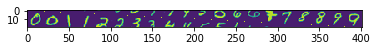

In [5]:
# Displaying a few training examples
imgs = 20
dim = 20
sample = np.linspace(0, X.shape[0]-1, imgs, dtype=int)
img = np.reshape(X[sample,:], (-1,dim))
plt.imshow(img.transpose())

In [20]:
def sigmoid(theta, X):
    sigM =  np.array([(1/(1 + np.exp(np.matmul(X, theta))))])
    return sigM

In [28]:
def costFunction(theta, reg, X, y):
    batch_size = y.size
    J = (-1/batch_size)*(np.matmul(y.transpose(), np.log(sigmoid(theta, X)).transpose()) + np.matmul((1-y).transpose(), np.log(1-sigmoid(theta, X)).transpose())).flatten() + (reg/2*batch_size)*np.sum(theta**2).flatten()
    return J

In [29]:
def gradient(theta, reg, X, y):
    batch_size = y.size
    diff = (sigmoid(theta, X) - y.transpose())
    grad = (1/batch_size)*((np.matmul(diff, X)).flatten() + reg*theta.flatten())
    grad[0] = grad[0] - reg*theta.flatten()[0]
    return grad

In [35]:
# 401 x 10
thetaMat = np.zeros((X.shape[1], labels), dtype=float)
reg = 1
# Generate 10 different models
for i in range(1, labels+1):
    res = minimize(costFunction, thetaMat[:,i-1:i], args=(reg, X, (y == i)*1), method=None, jac=gradient, options={'maxiter':100})
    print(res)

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00, -7.74530186e-08,
        4.91729643e-07, -2.32940155e-07,  5.96906573e-05,  6.01928054e-05,
        1.15367732e-05,  1.01547011e-05,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.17534888e-05, -2.08794594e-05, -3.26743345e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -2.10035403e-07,  1.03292772e-06,
       -1.85860754e-05, -3.20776025e-05,  8.42192691e-05,  2.80642800e-04,
        4.07120682e-04,  3.54123868e-04,  1.34235160e-04, -5.08950044e-05,
       -1.06831626e-04, -1.21784484e-04, -1.44363715e-04, -4.72936666e-05,
       -4.81601477e-06, -2.55182972e-05, -2.70139653e-05, -3.895901

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.97070738e-07, -1.15631298e-06,  6.44538994e-05,  7.50594141e-05,
        4.03447712e-05,  9.68564474e-06,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.19247007e-05, -1.96991592e-05, -2.38992290e-05,
       -1.78751787e-05, -7.19873366e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -2.04588780e-07, -1.03629082e-06,
        2.53608388e-10, -1.12721490e-05,  4.68488817e-05,  3.12233725e-04,
        4.68399106e-04,  3.64627681e-04,  1.39936378e-04, -3.86095673e-05,
       -5.98996068e-05,  2.28370157e-05,  1.04388617e-04,  1.42061981e-04,
        9.58477754e-05,  2.34739073e-05, -2.13109773e-05, -4.440904

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -7.33059300e-07, -4.35347733e-06,  3.57580116e-05,  7.66561632e-05,
        4.36939349e-05,  9.62096609e-06,  2.18079282e-05,  6.42732673e-06,
        1.26792620e-06,  9.53445640e-06,  5.17854711e-07,  8.30478111e-06,
        1.79020714e-05,  7.27430556e-06,  4.63698993e-08, -7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -3.19648693e-07, -1.04383229e-06,
        1.12360039e-05,  2.99494230e-05,  1.26007154e-04,  3.25096432e-04,
        4.30655129e-04,  3.61270484e-04,  1.36254019e-04, -4.11578210e-05,
       -1.67818810e-04, -2.81523708e-04, -1.68448257e-04, -1.98123715e-04,
       -2.15777752e-04, -6.41272978e-05,  1.10489619e-05, -1.785811

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.40902437e-07, -1.79007864e-06,  5.86512034e-05,  7.25995660e-05,
        4.27502038e-05,  3.76782407e-06, -2.56463474e-05, -8.78671535e-06,
       -1.21376294e-06, -1.19638654e-05, -2.08888208e-05, -3.26743345e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -2.26715686e-07, -8.74149036e-07,
        3.90946691e-07, -3.00562194e-06,  1.04507447e-04,  3.36128452e-04,
        4.73354920e-04,  2.75376724e-04, -1.50714410e-05, -1.26982212e-04,
       -7.63936462e-05, -9.14323135e-05, -1.38908378e-04, -4.55151399e-05,
       -4.89819070e-06, -2.62938964e-05, -2.72380695e-05, -3.871051

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.40902437e-07, -1.79007864e-06,  5.86512034e-05,  7.26926011e-05,
        4.02459167e-05,  9.71628200e-06,  2.18079282e-05,  7.05070976e-06,
       -5.46078091e-06, -1.23965527e-05, -1.08646514e-05, -1.89372702e-05,
       -2.33421415e-05, -6.93218954e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -1.99142157e-07, -8.34097672e-07,
       -2.56452717e-06, -1.43375936e-05,  8.20933670e-05,  3.01680535e-04,
        4.54980098e-04,  3.61934904e-04,  1.42110738e-04, -4.56087844e-05,
       -8.89334099e-05, -7.71301007e-05, -2.08011966e-04, -1.55934224e-04,
        1.62212606e-05, -1.59628098e-05, -2.40635149e-05, -4.031386

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -1.05426028e-06,  2.69255515e-07,  5.88842167e-05,  7.26737081e-05,
        4.02459167e-05,  9.71628200e-06,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.17534888e-05, -2.08794594e-05, -3.26743345e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00, -2.46800109e-08,  3.63562092e-07, -5.80948596e-07,
       -1.29199176e-06, -3.77784637e-05,  7.93724384e-05,  2.98766388e-04,
        4.47941963e-04,  3.53729839e-04,  1.36140899e-04, -4.97781063e-05,
       -1.05250846e-04, -1.21179739e-04, -1.43880293e-04, -4.66070857e-05,
       -4.73339631e-06, -2.62941006e-05, -2.72380695e-05, -3.871051

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -5.30046637e-07,  1.03239039e-07, -4.28331750e-05, -6.64112524e-05,
       -1.75879330e-05, -4.00522876e-06,  2.42827342e-05,  9.25580576e-06,
       -5.31946147e-06, -1.11150109e-05, -1.47839222e-05, -3.05467473e-05,
       -2.38514008e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -1.99142157e-07, -8.34097672e-07,
       -1.91482333e-06, -4.21780535e-06, -1.17007545e-04, -3.76310655e-04,
       -4.72827078e-04, -3.52880265e-04, -6.30230409e-05, -8.96597733e-06,
       -7.89047947e-05, -1.09436264e-04, -2.08523965e-04, -7.20250800e-05,
       -1.23285165e-06, -2.17845350e-05, -2.24906411e-05, -2.378778

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.40902437e-07, -1.79007864e-06,  5.86512034e-05,  7.26926011e-05,
        4.02459167e-05,  9.71628200e-06,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.17534888e-05, -2.08794594e-05, -3.26743345e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -1.99142157e-07, -8.34097672e-07,
       -2.59924939e-06, -1.37793488e-05,  8.27274901e-05,  3.04455147e-04,
        4.64109975e-04,  3.72853988e-04,  1.43418370e-04, -5.07251379e-05,
       -1.06332273e-04, -1.19185459e-04, -1.36508664e-04, -3.24353469e-05,
        6.73749830e-06, -2.35408667e-05, -2.74064279e-05, -3.886029

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.40902437e-07, -1.79007864e-06,  5.86512034e-05,  7.26926011e-05,
        4.02459167e-05,  9.71628200e-06,  2.18079282e-05,  7.05070976e-06,
       -5.53141680e-06, -9.14828177e-06, -1.77991388e-05, -3.29445381e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -1.99142157e-07, -8.34097672e-07,
       -2.56636540e-06, -1.44423730e-05,  8.33565751e-05,  3.03798386e-04,
        4.59871732e-04,  3.76566066e-04,  1.75638142e-04, -1.31373111e-05,
       -8.57177577e-05, -1.45561745e-04, -1.75437806e-04, -4.00538280e-05,
       -2.88093171e-06, -2.60052594e-05, -2.62362079e-05, -3.639365

      fun: array([0.69314718])
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.40902437e-07, -1.79007864e-06,  5.86512034e-05,  7.26926011e-05,
        4.02459167e-05,  9.71628200e-06,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.17534888e-05, -2.08794594e-05, -3.26743345e-05,
       -2.35833248e-05, -6.85661765e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -1.99142157e-07, -8.34097672e-07,
       -2.56452717e-06, -1.42989907e-05,  8.20161952e-05,  2.98347610e-04,
        4.47927389e-04,  3.53500706e-04,  1.34235160e-04, -5.08286237e-05,
       -1.07588366e-04, -1.22462028e-04, -1.44337163e-04, -4.72887646e-05,
       -4.79718988e-06, -2.62880753e-05, -2.72380695e-05, -3.871051

In [10]:
def func(x):
    return x[0]**2 + 2*x[1]**2 + 1

In [11]:
def grad(x):
    print([2*x[0], 4*x[1]])
    return np.array([2*x[0], 4*x[1]])

In [12]:
arr = np.array([4, 3])
res = minimize(func, arr, method=None, jac=grad, options={'maxiter':500})
print(res)

[8.0, 12.0]
[6.879505603625038, 8.638516810875114]
[1.1387818182590204, 5.772126830370924]
[0.7789234909784278, -3.1200113327591605]
[-0.09077208341427057, 0.007346959640522233]
[0.00637658651191092, 0.0035465645766387588]
[-9.440541426444793e-07, -4.826530018832561e-05]
[-1.2457472392875187e-07, 4.4201207669640713e-07]
      fun: 1.0000000000000282
 hess_inv: array([[ 0.50073554, -0.00130491],
       [-0.00130491,  0.25231502]])
      jac: array([-1.24574724e-07,  4.42012077e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-6.22873620e-08,  1.10503019e-07])


In [13]:
def giveAccuracy(X, y, thetaMat):
    result = np.matmul(X, thetaMat)
    result = (1/(1 + np.exp(-result)))
    y[y == 10] = 0
    y = y.flatten()
    y_pred = np.argmax(result, axis=1)
    y_pred = (y_pred + 1)%10
    check = (y == y_pred)*1
    return (100*np.sum(check))/(X.shape[0])

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter=2000).fit(X_old, y)
y_pred = model.predict(X_old)
y = y.flatten()
print("Accuracy : %f" %((100*np.sum(y == y_pred))/X_old.shape[0]))

Accuracy : 96.240000


In [3]:
# For neural network
weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1)
L2 = (1/(1 + np.exp(-np.matmul(theta1, X.transpose()))))
L2 = np.concatenate((np.ones((1, 5000)), L2), axis=0)
L3 = (1/(1 + np.exp(-np.matmul(theta2, L2)))).transpose()
y[y == 10] = 0
y = y.flatten()
y_pred = np.argmax(L3, axis=1)
y_pred = (y_pred + 1)%10
check = (y == y_pred)*1
print("Accuracy : %f" %(100*np.sum(check)/(X.shape[0])))

[[-2.25623899e-02 -1.05624163e-08  2.19414684e-09 ... -1.30529929e-05
  -5.04175101e-06  2.80464449e-09]
 [-9.83811294e-02  7.66168682e-09 -9.75873689e-09 ... -5.60134007e-05
   2.00940969e-07  3.54422854e-09]
 [ 1.16156052e-01 -8.77654466e-09  8.16037764e-09 ... -1.20951657e-04
  -2.33669661e-06 -7.50668099e-09]
 ...
 [-1.83220638e-01 -8.89272060e-09 -9.81968100e-09 ...  2.35311186e-05
  -3.25484493e-06  9.02499060e-09]
 [-7.02096331e-01  3.05178374e-10  2.56061008e-09 ... -8.61759744e-04
   9.43449909e-05  3.83761998e-09]
 [-3.50933229e-01  8.85876862e-09 -6.57515140e-10 ... -1.80365926e-06
  -8.14464807e-06  8.79454531e-09]]
Accuracy : 97.520000
